# Graduate Admission Analysis and Prediction

## Introduction to Dataset

This dataset includes data for UCLA Graduate Admissions, originally found on Kaggle. It consists of several admission scores/criterias of various candidates and a column named "Chance of Admit" which is on a scale of 0-1 (1 being high).

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv("UCLA_Graduate_Admissions.csv")

## Exploratory Data Analysis

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.drop('Serial No.', inplace = True, axis = 1)
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis = 1, inplace = True)

The dataset has following columns: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research and Chance of Admit.

In [7]:
data.shape

(500, 8)

The dataset has 500 records and 8 columns.

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
## Correlation Coefficients
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1, 'Correlation Factors Heat Map')

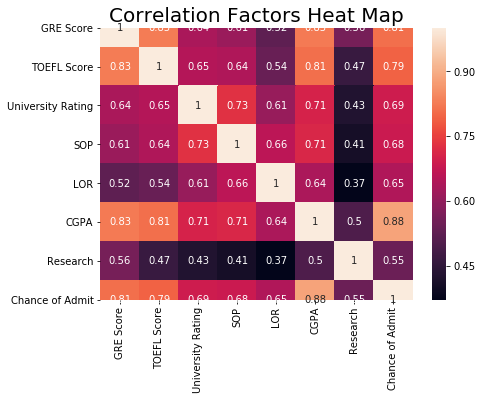

In [20]:
## Correlation coeffecients heatmap
size = (7,5)
fig, ax = plt.subplots(figsize = size)
sns.heatmap(ax = ax, data = data.corr(), annot = True).set_title('Correlation Factors Heat Map', color = 'black', size = 20)

Finding correlation of all other variables to the 'Chance of Admit'.

In [24]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])

In [25]:
COA_corr

,Chance of Admit
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
CGPA,0.882413
Research,0.545871
Chance of Admit,1.000000


In [26]:
#sorting correlations in descending manner
COA_corr.sort_values(['Chance of Admit'], ascending = False, inplace = True)

In [27]:
COA_corr

,Chance of Admit
Chance of Admit,1.000000
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


In [28]:
#dropping the 'Chance of Admit' from the correlations rows
COA_corr.drop('Chance of Admit', inplace = True)

In [29]:
COA_corr

,Chance of Admit
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


In [30]:
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Chance of Admit']

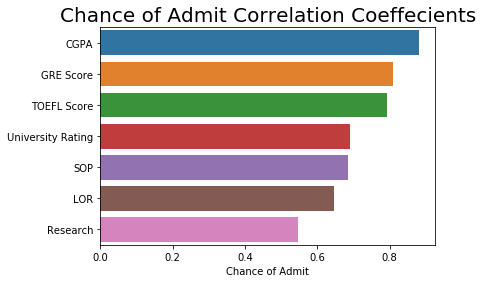

In [36]:
sns.barplot(y = COA_corr_x, x = COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size = 20)
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score.

## Training and Testing Data

In [37]:
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = data['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

## Training the Model

### Linear Regression with all variables

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeffecients'])
coeff

,Coeffecients
GRE Score,0.002134
TOEFL Score,0.003226
University Rating,0.003048
SOP,0.001616
LOR,0.015597
CGPA,0.120226
Research,0.016726


## Predicting Test Data

In [44]:
predictions = lm.predict(X_test)

In [45]:
print("Intercept : ",lm.intercept_)

Intercept :  -1.4071517979913029


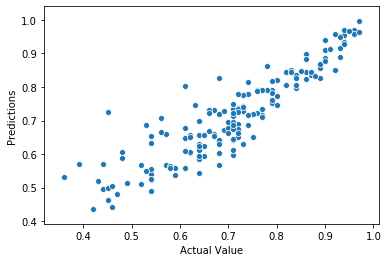

In [46]:
sns.scatterplot(y_test, predictions)
plt.ylabel("Predictions")
plt.xlabel("Actual Value")
plt.show()

## Residuals

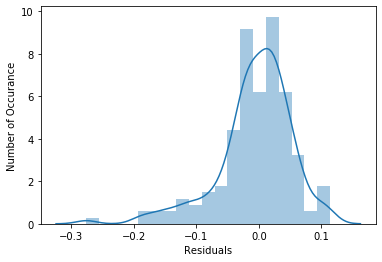

In [47]:
residuals = y_test - predictions
sns.distplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Number of Occurance")
plt.show()

The scatter plot for the actual and predicted values shows distortion for chances of admit lower than 0.3, while the distribution plot for residuals show a normal distribution with a mean of 0.0. Therefore, we can conclude that our Linear Regression perfomed well on this dataset.

## Conclusion

In [48]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R_squared = metrics.r2_score(y_test, predictions)
pd.DataFrame(data=[MAE, MSE, RMSE, R_squared], index=['MAE', 'MSE', 'RMSE', 'R Squared'], columns=['Value'])

,Value
MAE,0.043089
MSE,0.003621
RMSE,0.060178
R Squared,0.824231


##### To conclude the model explains 82% of the variability and has an error of .06 in predictions.

What do the Linear Regression Models tell us?

1.Including all variables in the model yielded a R Sqaured value of .82, implying that these variables are the factors that will most likely to get you that graduate degree admission, so other variables such as age, work experience or even gender will not contribute much into your admission.

2.Telling by the correlation factor, CGPA is the most important factor.